In [28]:
import requests

api_key = 'a3f031a9-67fe-48b0-8438-260ddf04880e'
api_url = 'https://fortnite-api.com/v2/stats/br/v2'
player_name = None

def get_player_input():
    global player_name
    if player_name is None:
        player_name = input('Enter name: ')
    return player_name

def get_player_stats(player_name):
    headers = {'Authorization': api_key}
    params = {'name': player_name}
    response = requests.get(api_url, headers=headers, params=params)

    if response.status_code == 200:
        data = response.json()
        overall_stats = data.get('data', {}).get('stats', {}).get('all', {}).get('overall', {})
        solo_stats = data.get('data', {}).get('stats', {}).get('all', {}).get('solo', {})
        duo_stats = data.get('data', {}).get('stats', {}).get('all', {}).get('duo', {})
        squad_stats = data.get('data', {}).get('stats', {}).get('all', {}).get('squad', {})
        
        return overall_stats, solo_stats, duo_stats, squad_stats
    else:
        print(f"Error calling the API. Status code: {response.status_code}")
        print(response.text)
        return None

def print_stats(stats, player_name, stat_names):
    for stat_name in stat_names:
        print_stat(stat_name, stats, player_name)

def print_stat(stat_name, stats, player_name):
    if stats and stat_name in stats:
        stat_value = stats[stat_name]
        print(f"Number of {stat_name} for {player_name}: {stat_value}")

# Aangepaste statistieken toevoegen
def main():
    player_name = get_player_input()
    player_stats = get_player_stats(player_name)

    if player_stats:
        overall_stats, solo_stats, duo_stats, squad_stats = player_stats

        stat_names_overall = ['wins', 'top3', 'top5', 'top6', 'top10', 'top12', 'top25', 'kills', 'killsPerMatch', 'deaths', 'kd', 'matches', 'winRate', 'minutesPlayed']
        stat_names_solo = ['wins', 'top10', 'top25', 'kills', 'killsPerMatch', 'deaths', 'kd', 'matches', 'winRate', 'minutesPlayed']
        stat_names_duo = ['wins', 'top5', 'top12', 'kills', 'killsPerMatch', 'deaths', 'kd', 'matches', 'winRate', 'minutesPlayed']
        stat_names_squad = ['wins', 'top3', 'top6', 'kills', 'killsPerMatch', 'deaths', 'kd', 'matches', 'winRate', 'minutesPlayed']

        print("Overall stats:")
        print_stats(overall_stats, player_name, stat_names_overall)

        print("\nSolo stats:")
        print_stats(solo_stats, player_name, stat_names_solo)

        print("\nDuo stats:")
        print_stats(duo_stats, player_name, stat_names_duo)

        print("\nSquad stats:")
        print_stats(squad_stats, player_name, stat_names_squad)

    else:
        print("Player information not available.")

if __name__ == "__main__":
    main()


Overall stats:
Number of wins for MongraalABC123: 2967
Number of top3 for MongraalABC123: 1048
Number of top5 for MongraalABC123: 1225
Number of top6 for MongraalABC123: 1351
Number of top10 for MongraalABC123: 1866
Number of top12 for MongraalABC123: 1791
Number of top25 for MongraalABC123: 3036
Number of kills for MongraalABC123: 110227
Number of killsPerMatch for MongraalABC123: 3.465
Number of deaths for MongraalABC123: 28842
Number of kd for MongraalABC123: 3.822
Number of matches for MongraalABC123: 31809
Number of winRate for MongraalABC123: 9.328
Number of minutesPlayed for MongraalABC123: 360749

Solo stats:
Number of wins for MongraalABC123: 900
Number of top10 for MongraalABC123: 1866
Number of top25 for MongraalABC123: 3036
Number of kills for MongraalABC123: 37830
Number of killsPerMatch for MongraalABC123: 3.581
Number of deaths for MongraalABC123: 9664
Number of kd for MongraalABC123: 3.915
Number of matches for MongraalABC123: 10564
Number of winRate for MongraalABC123:

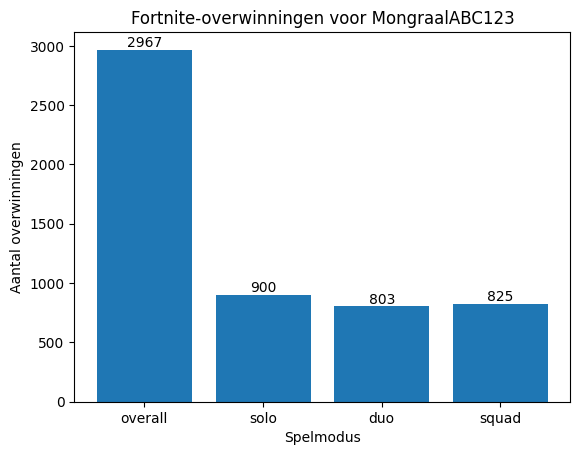

In [29]:
import matplotlib.pyplot as plt

def plot_wins_bar_chart(overall_stats, solo_stats, duo_stats, squad_stats, player_name):
    stat_names = ['overall', 'solo', 'duo', 'squad']

    # Check if stats is not None before accessing attributes
    wins = [stats.get('wins', 0) if stats is not None else 0 for stats in [overall_stats, solo_stats, duo_stats, squad_stats]]

    plt.bar(stat_names, wins)

    # Print waarden op de balken
    for i, win_count in enumerate(wins):
        plt.text(i, win_count, str(win_count), ha='center', va='bottom')

    plt.xlabel('Spelmodus')
    plt.ylabel('Aantal overwinningen')
    plt.title(f'Fortnite-overwinningen voor {player_name}')
    plt.show()

# Roep de get_player_input en main functies aan om de gegevens te verkrijgen en weer te geven
player_name = get_player_input()
player_stats = get_player_stats(player_name)
if player_stats:
    overall_stats, solo_stats, duo_stats, squad_stats = player_stats
    plot_wins_bar_chart(overall_stats, solo_stats, duo_stats, squad_stats, player_name)
else:
    print("Spelerinformatie niet beschikbaar.")


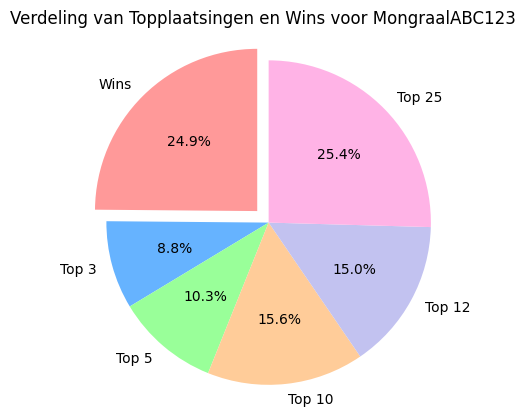

In [30]:
def get_top_placement_percentages(stats):
    if stats:
        total_matches = stats.get('matches', 0)
        # Bereken de percentages
        win_percentage = (stats.get('wins', 0) / total_matches) * 100
        top3_percentage = (stats.get('top3', 0) / total_matches) * 100
        top5_percentage = (stats.get('top5', 0) / total_matches) * 100
        top10_percentage = (stats.get('top10', 0) / total_matches) * 100
        top12_percentage = (stats.get('top12', 0) / total_matches) * 100
        top25_percentage = (stats.get('top25', 0) / total_matches) * 100

        return win_percentage, top3_percentage, top5_percentage, top10_percentage, top12_percentage, top25_percentage
    else:
        return 0, 0, 0, 0, 0, 0

def plot_pie_chart(player_name, percentages):
    labels = ['Wins', 'Top 3', 'Top 5', 'Top 10', 'Top 12', 'Top 25']
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
    explode = (0.1, 0, 0, 0, 0, 0)

    plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
    plt.title(f'Verdeling van Topplaatsingen en Wins voor {player_name}')
    plt.axis('equal')

    # Toon de pie chart
    plt.show()

def main():
    player_name = get_player_input()
    player_stats = get_player_stats(player_name)

    if player_stats:
        overall_stats, solo_stats, duo_stats, squad_stats = player_stats

        # Gebruik overall_stats voor het berekenen van de top placement percentages
        win_percentage, top3_percentage, top5_percentage, top10_percentage, top12_percentage, top25_percentage = get_top_placement_percentages(overall_stats)

        # Plot de pie chart
        plot_pie_chart(player_name, [win_percentage, top3_percentage, top5_percentage, top10_percentage, top12_percentage, top25_percentage])

    else:
        print("Player information not available.")

if __name__ == "__main__":
    main()